# 1. ARIMA model using diffrencing  --- shift()
# 2.ARIMA model using log diffrencing --- take log first and then shift()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('AirPassengers.csv')

In [4]:
df['Month'] = pd.to_datetime(df['Month'])
df =  df.set_index(['Month'])

In [33]:
df['Seasonal_1month_Difference']=df['Passengers']-df['Passengers'].shift(1)

In [34]:
df.head()

,Passengers,Seasonal_12month_Difference,Seasonal_2month_Difference,Seasonal_1month_Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,6.0
1949-03-01,132,NaN,20.0,14.0
1949-04-01,129,NaN,11.0,-3.0
1949-05-01,121,NaN,-11.0,-8.0


<AxesSubplot:xlabel='Month'>

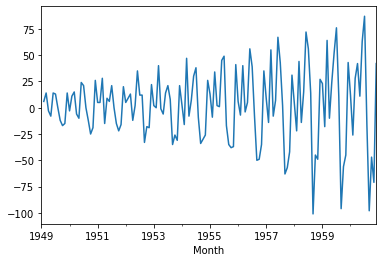

In [35]:
df['Seasonal_1month_Difference'].plot()

In [10]:
from statsmodels.tsa.stattools import adfuller

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [36]:
adfuller_test(df['Seasonal_1month_Difference'][1:])

ADF Test Statistic : -2.8292668241700034
p-value : 0.054213290283824954
#Lags Used : 12
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### differencing tells us that d=2 gives the stationary time series (identified using ADF test)
### for d=1 , TS is not stationary

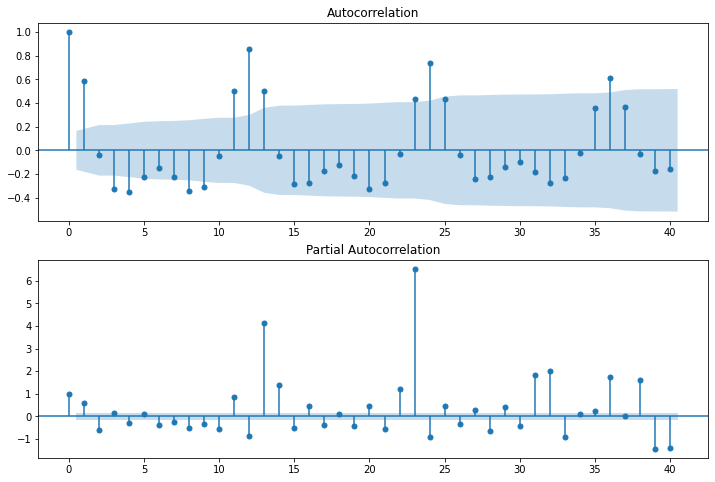

In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal_2month_Difference'].iloc[2:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal_2month_Difference'].iloc[2:],lags=40,ax=ax2)

## For d (differencing )=2 i.e 2nd order differencing --- TS is stationary
## PACF p = 1,2,12,13,23
## q = 1
##### link: https://arauto.readthedocs.io/en/latest/how_to_choose_terms.html

In [29]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score

def ARIMA_function(data,p,d,q,predict_m):
    a  = df.shape[0]
    train_data = data[0:a-predict_m]
    test_data =data[a-predict_m:]
    model1 = ARIMA(train_data, order=(p,d,q))
    model_fit1 = model1.fit()
    # make prediction
    predictions = model_fit1.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)
    compare_df = pd.concat(
        [data.tail(predict_m),
        predictions.apply(np.floor)], axis=1).rename(
        columns={'Passengers': 'actual', 0:'predicted'})
    compare_df.plot()
    r2 = r2_score(data.tail(predict_m), predictions.apply(np.floor))
    print("r2_score:{} ,AIC:{},BIC:{}".format(r2 , model_fit1.aic,model_fit1.bic))
    return r2

r2_score:0.9380871707993224 ,AIC:1084.5841448131114,BIC:1128.2739680991522


0.9380871707993224

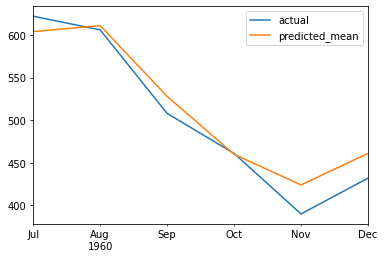

In [30]:
ARIMA_function(df['Passengers'],13,2,1,6)

r2_score:0.9596338270482658 ,AIC:1087.4871523382494,BIC:1160.3035244816508


0.9596338270482658

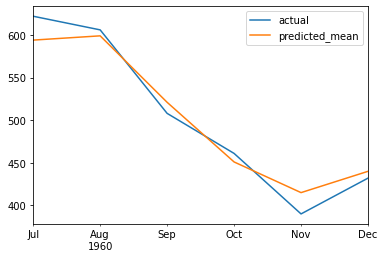

In [31]:
ARIMA_function(df['Passengers'],23,2,1,6)

r2_score:0.9693478530349757 ,AIC:1093.180884631728,BIC:1133.9580530320327


0.9693478530349757

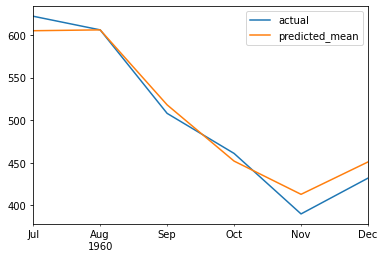

In [32]:
ARIMA_function(df['Passengers'],12,2,1,6)

r2_score:-0.4291338139008989 ,AIC:1319.6790990762988,BIC:1331.329718619243


-0.4291338139008989

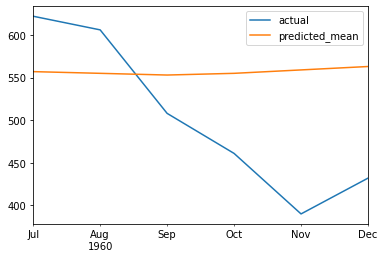

In [37]:
ARIMA_function(df['Passengers'],2,2,1,6)

## conclusion : p=12,d=2,q=1 is the best model for ARIMA after considering r2_score,AIC,BIC

In [38]:
df.head()

,Passengers,Seasonal_12month_Difference,Seasonal_2month_Difference,Seasonal_1month_Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,6.0
1949-03-01,132,NaN,20.0,14.0
1949-04-01,129,NaN,11.0,-3.0
1949-05-01,121,NaN,-11.0,-8.0


In [39]:
df['log_values1'] = np.log(df['Passengers'])

In [40]:
df.head()

,Passengers,Seasonal_12month_Difference,Seasonal_2month_Difference,Seasonal_1month_Difference,log_values1
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,4.718499
1949-02-01,118,NaN,NaN,6.0,4.770685
1949-03-01,132,NaN,20.0,14.0,4.882802
1949-04-01,129,NaN,11.0,-3.0,4.859812
1949-05-01,121,NaN,-11.0,-8.0,4.795791


In [41]:
df['log_differences'] = df['Passengers'] - df['log_values1']

In [42]:
df.head()

,Passengers,Seasonal_12month_Difference,Seasonal_2month_Difference,Seasonal_1month_Difference,log_values1,log_differences
Month,,,,,,
1949-01-01,112,NaN,NaN,NaN,4.718499,107.281501
1949-02-01,118,NaN,NaN,6.0,4.770685,113.229315
1949-03-01,132,NaN,20.0,14.0,4.882802,127.117198
1949-04-01,129,NaN,11.0,-3.0,4.859812,124.140188
1949-05-01,121,NaN,-11.0,-8.0,4.795791,116.204209


<AxesSubplot:xlabel='Month'>

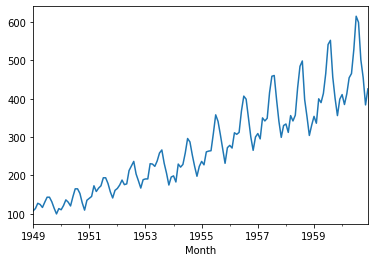

In [43]:
df['log_differences'].plot()

In [44]:
adfuller_test(df['log_differences'])

ADF Test Statistic : 0.8220303563593591
p-value : 0.9919835838582413
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:xlabel='Month'>

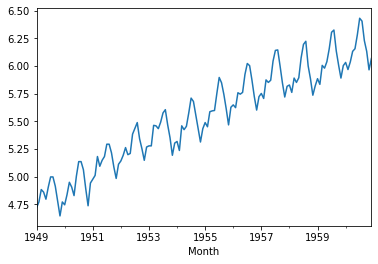

In [45]:
df['log_values1'].plot()

In [46]:
adfuller_test(df['log_values1'])

ADF Test Statistic : -1.7170170891069625
p-value : 0.4223667747703904
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Both TS -i.e log values and log value diff are not stationary

In [47]:
df['log_shift_1']= df['log_values1']-df['log_values1'].shift(1)

<AxesSubplot:xlabel='Month'>

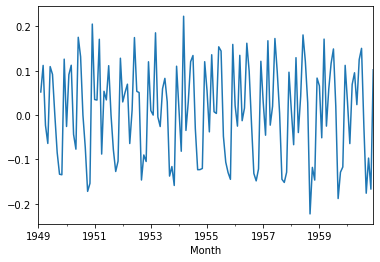

In [48]:
df['log_shift_1'].plot()

In [50]:
adfuller_test(df['log_shift_1'][1:])

ADF Test Statistic : -2.7171305983881595
p-value : 0.07112054815085424
#Lags Used : 14
Number of Observations Used : 128
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [89]:
df['log_shift_new']= df['log_values1']-df['log_values1'].shift()

<AxesSubplot:xlabel='Month'>

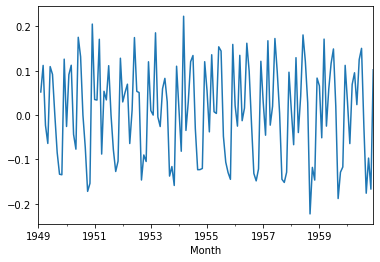

In [90]:
df['log_shift_new'].plot()

In [93]:

adfuller_test(df['log_shift_new'][1:])

ADF Test Statistic : -2.7171305983881595
p-value : 0.07112054815085424
#Lags Used : 14
Number of Observations Used : 128
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## log difference with 2 nd order is staionary So d=1 or i can say "I" in ARIMA is 1

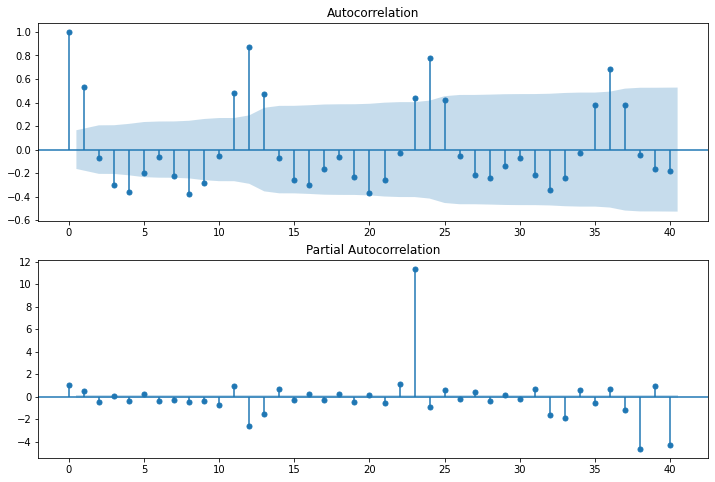

In [55]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['log_shift_2'].iloc[2:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['log_shift_2'].iloc[2:],lags=40,ax=ax2)

## 1. prediction for p -PACF ---> 1,2,12,13,23
## 2.prediction for q value -ACF --> q=1,2
## 3. d=1

plotting ARIMA model


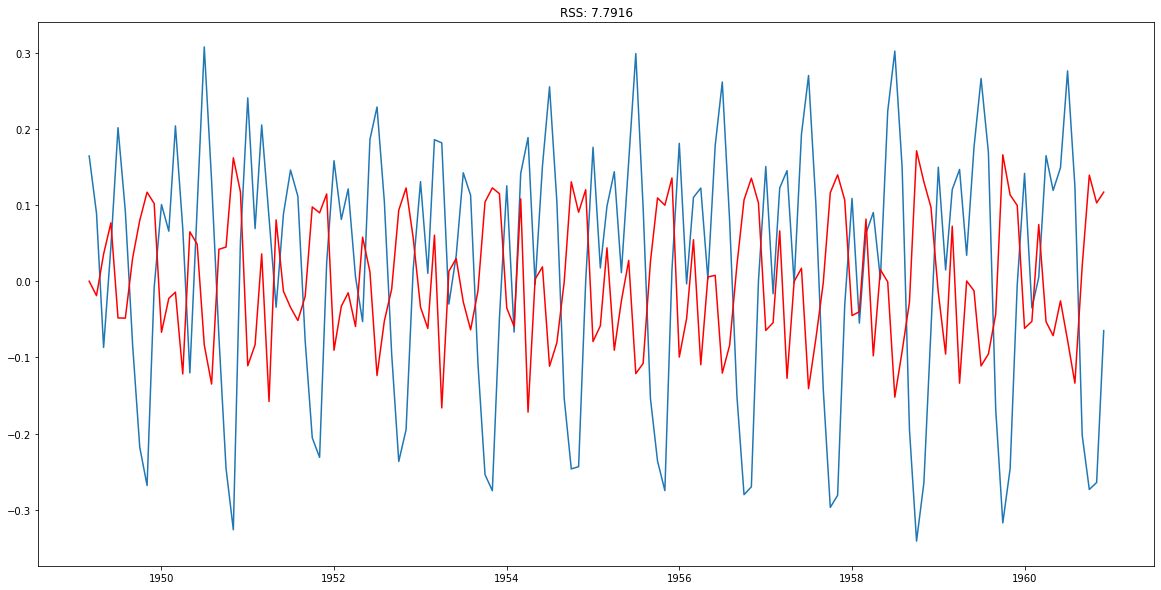

In [109]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(df['log_values1'], order=(2,2,2))
results=model.fit(disp=-1)
plt.plot(df['log_shift_2'][2:])
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-df['log_shift_2'][2:])**2))
print('plotting ARIMA model')

plotting ARIMA model


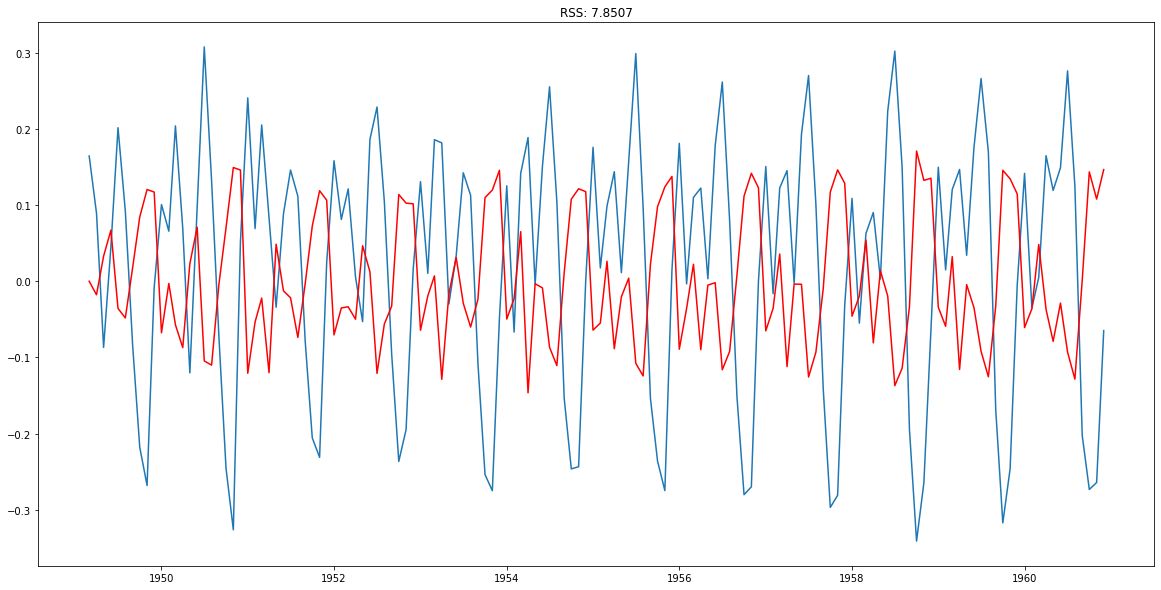

In [115]:
plt.figure(figsize=(20,10))
model=ARIMA(df['log_values1'], order=(2,2,1))
results=model.fit(disp=-1)
plt.plot(df['log_shift_2'][2:])
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-df['log_shift_2'][2:])**2))
print('plotting ARIMA model')

plotting ARIMA model


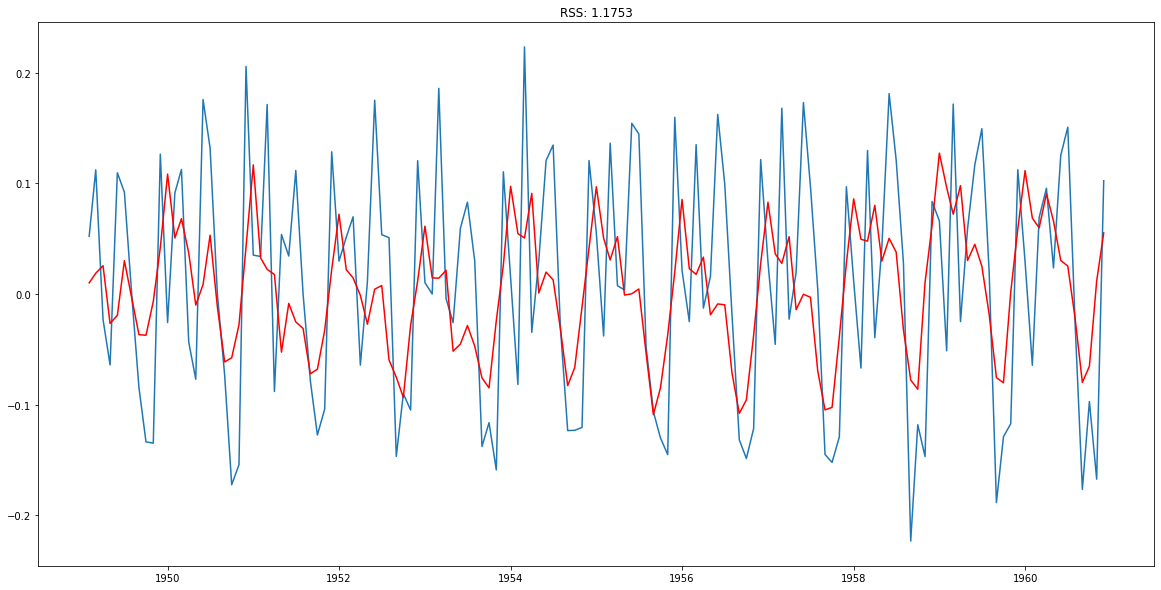

In [112]:
plt.figure(figsize=(20,10))
model=ARIMA(df['log_values1'], order=(2,1,1))
results=model.fit(disp=-1)
plt.plot(df['log_shift_1'][1:])
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-df['log_shift_1'][1:])**2))
print('plotting ARIMA model')

plotting ARIMA model


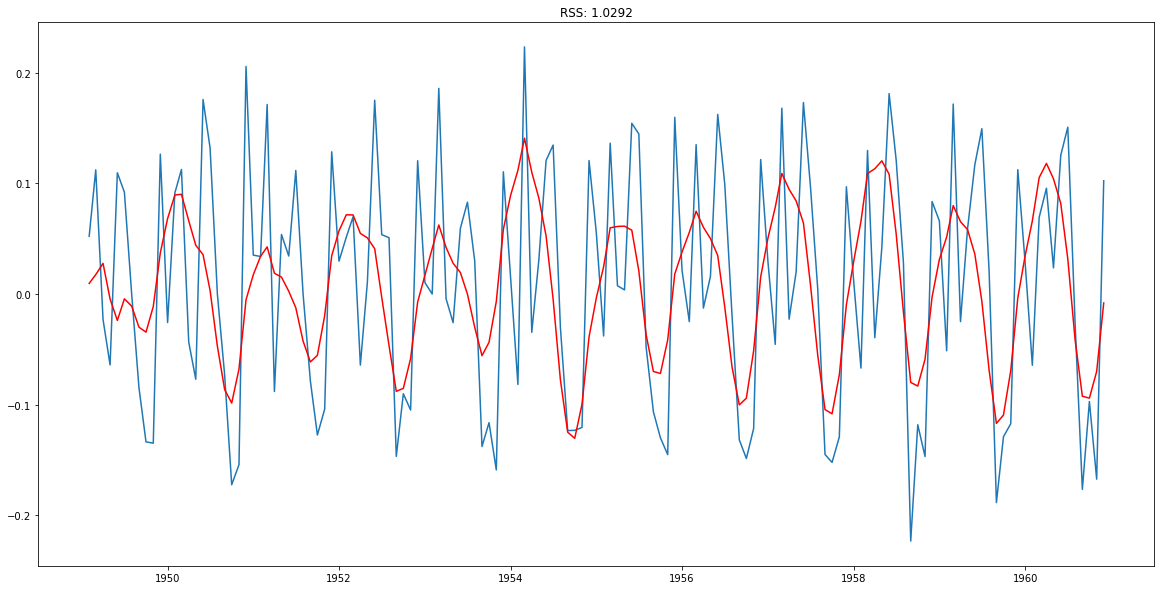

In [116]:
plt.figure(figsize=(20,10))
model=ARIMA(df['log_values1'], order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(df['log_shift_1'][1:])
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-df['log_shift_1'][1:])**2))
print('plotting ARIMA model')

plotting ARIMA model


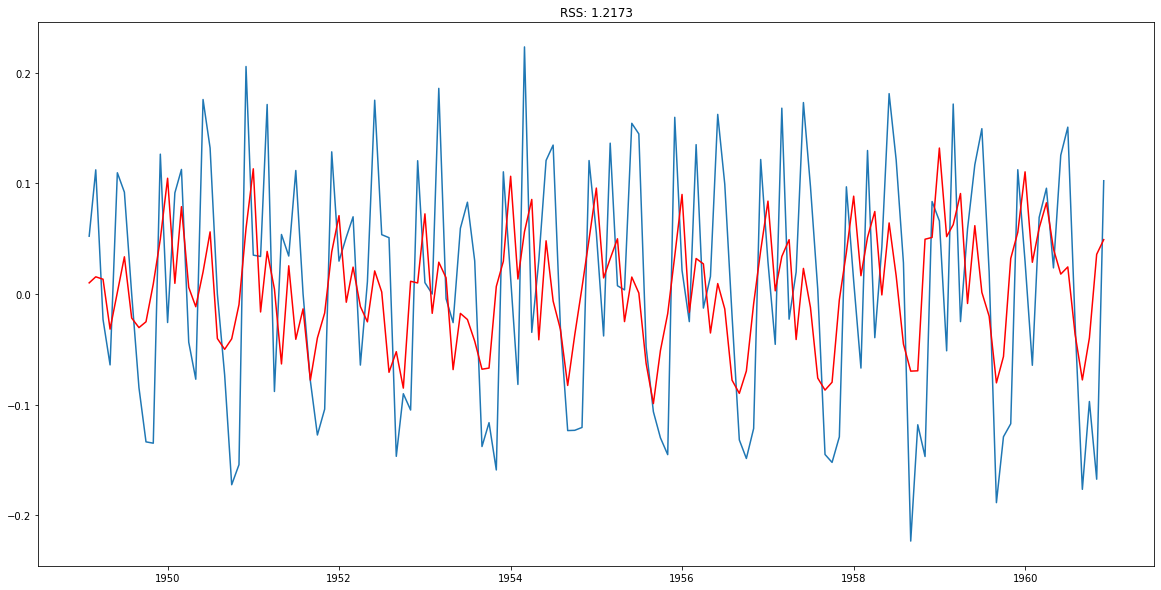

In [114]:
plt.figure(figsize=(20,10))
model=ARIMA(df['log_values1'], order=(1,1,2))
results=model.fit(disp=-1)
plt.plot(df['log_shift_1'][1:])
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-df['log_shift_1'][1:])**2))
print('plotting ARIMA model')

## as per residual sum of squares ---- ARIMA(2,1,2) has least RSS,so this model can be selected

In [130]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [131]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [132]:
predictions_log=pd.Series(df['log_values1'], index=df.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.780265
1949-03-01    4.909873
1949-04-01    4.914554
1949-05-01    4.846011
dtype: float64

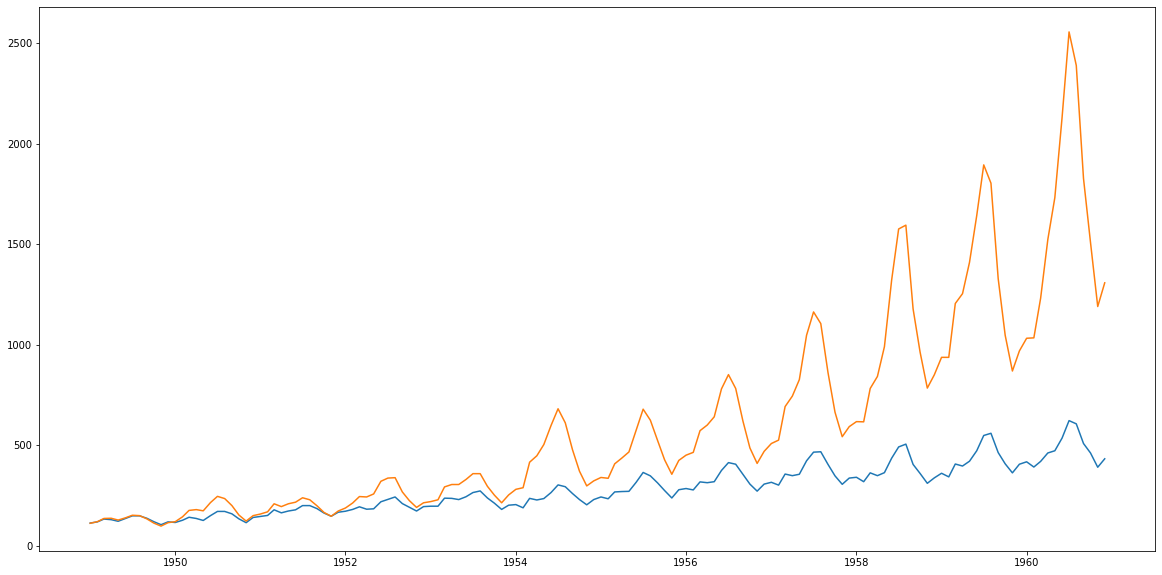

In [136]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(df['Passengers'])
plt.plot(np.floor(predictions_ARIMA))

In [154]:
df_predicted = pd.DataFrame(np.floor(predictions_ARIMA),columns =['predicted'])

In [175]:
df_predicted.head()

,predicted
Month,
1949-01-01,111.0
1949-02-01,119.0
1949-03-01,135.0
1949-04-01,136.0
1949-05-01,127.0


In [173]:
df_predicted_data = pd.concat([df_predicted,df['Passengers']],axis=1)

In [174]:
df_predicted_data.head()

,predicted,Passengers
Month,,
1949-01-01,111.0,112
1949-02-01,119.0,118
1949-03-01,135.0,132
1949-04-01,136.0,129
1949-05-01,127.0,121


<AxesSubplot:xlabel='Month'>

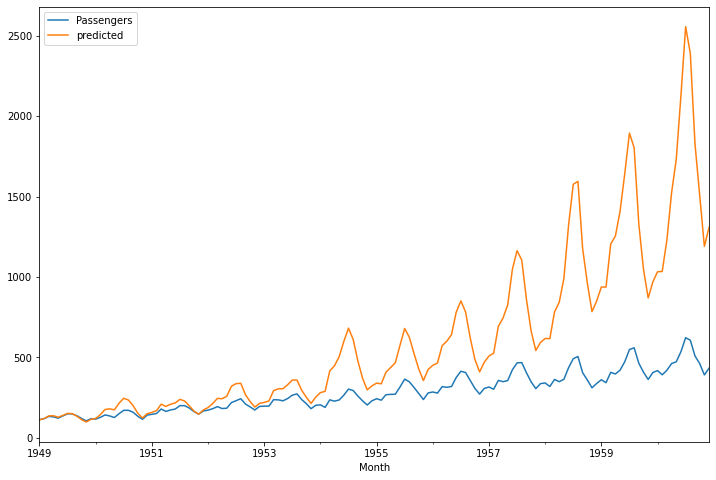

In [179]:
df_predicted_data[['Passengers','predicted']].plot(figsize=(12,8))

In [180]:
from sklearn.metrics import r2_score
r2 = r2_score(df_predicted_data['predicted'],df_predicted_data['Passengers'])

In [181]:
r2

-0.005853587127543136